In [1]:
import os
import numpy as np
import pandas as pd
import finance as fin
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
h = fin.holdings()
h.buy("AAPL", 2, 10)
h.buy("GOOGL", 1, 12)
print("qty:", h.qty["AAPL"])
print("book value:", h.book_value["AAPL"])
print(h.total_return("AAPL", 13))
h.sell("AAPL", 2, 13)
print(h.total_return("AAPL", 11))

print(h.qty)
print(h.book_value)
print(h.realized_return)

qty: 2
book value: 20
6
0
{'AAPL': 0, 'GOOGL': 1}
{'AAPL': 0, 'GOOGL': 12}
{'AAPL': 6.0, 'GOOGL': 0}


In [3]:
s1.PE_RATIO_MAX = 4
print(s1.PE_RATIO_MAX)
print(s2.PE_RATIO_MAX)

4
1000


In [14]:
"""load data"""
symbols = ['GSPC', 'DJI', 'MSFT', 'GOOGL', 'XOM', 'BAC', 'AAPL', 'JNJ', 'AMZN', 'IBM', 'KO', 'WMT']
dates = pd.date_range('2012-01-01', '2015-12-31')
df = fin.get_data(symbols, dates)

In [15]:
df.head()

,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
2012-01-03,1277.060059,12397.37988,22.909807,333.038025,72.083488,5.494183,52.852215,55.568245,179.029999,159.145142,29.434118,51.942726
2012-01-04,1277.300049,12418.41992,23.448965,334.474487,72.100227,5.503655,53.136253,55.230865,177.509995,158.495911,29.249483,51.408920
2012-01-05,1281.060059,12415.70020,23.688589,329.834839,71.882317,5.977293,53.726177,55.163387,177.610001,157.744171,29.110989,51.159237
2012-01-06,1277.810059,12359.91992,24.056585,325.335327,71.345901,5.854147,54.287819,54.682598,182.610001,155.933182,28.926338,50.797626
2012-01-09,1280.699951,12392.69043,23.739935,311.541534,71.664398,5.939402,54.201706,54.766941,178.559998,155.121643,28.926338,50.952602


996
first element:  -0.0488420684095
min: -0.112748107132
max: 0.283182500649
mean: 0.009949816402609444
median: 0.007199491397204993


(array([  30.,  120.,  330.,  347.,  133.,   17.,    9.,    4.,    2.,    4.]),
 array([-0.11274811, -0.07315505, -0.03356199,  0.00603108,  0.04562414,
         0.0852172 ,  0.12481026,  0.16440332,  0.20399638,  0.24358944,
         0.2831825 ]),
 <a list of 10 Patch objects>)

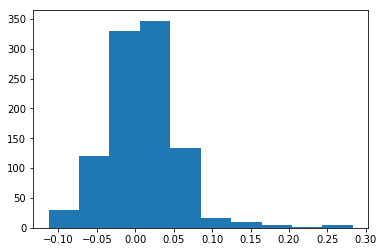

In [4]:
n_days = 10
symbol = 'GOOGL'
momentum_ds = fin.momentum_series(df[symbol], n_days)
print (len(momentum_ds))
print ('first element: ' , momentum_ds[0])
print ('min:' , momentum_ds.min())
print ('max:' , momentum_ds.max())
print ('mean:' , momentum_ds.mean())
print ('median:' , momentum_ds.median())
plt.hist(momentum_ds)

(array([  30.,  120.,  330.,  347.,  133.,   17.,    9.,    4.,    2.,    4.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

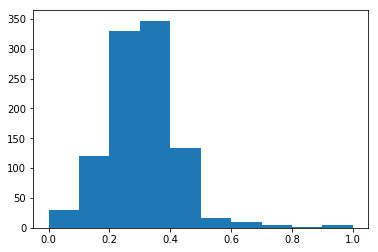

In [14]:
norm_mom_ds = fin.min_max_normalize(momentum_ds)
plt.hist(norm_mom_ds)norm_mom_ds

In [15]:
thresholds = fin.discrete_thresholds(norm_mom_ds, 10)
thresholds

array([ 0.17552853,  0.22366279,  0.25105398,  0.28067626,  0.3028909 ,
        0.32733029,  0.3593821 ,  0.39107012,  0.43564717,  1.        ])

In [16]:
print (fin.discretize(0.9, thresholds))

9


In [17]:
norm_mom_ds

2012-01-18    0.161407
2012-01-19    0.176261
2012-01-20    0.004914
2012-01-23    0.034148
2012-01-24    0.116255
2012-01-25    0.067314
2012-01-26    0.051307
2012-01-27    0.085565
2012-01-30    0.093620
2012-01-31    0.090010
2012-02-01    0.076937
2012-02-02    0.069702
2012-02-03    0.329334
2012-02-06    0.386439
2012-02-07    0.397111
2012-02-08    0.463764
2012-02-09    0.477540
2012-02-10    0.397687
2012-02-13    0.435647
2012-02-14    0.413858
2012-02-15    0.392304
2012-02-16    0.377186
2012-02-17    0.319963
2012-02-21    0.305127
2012-02-22    0.289637
2012-02-23    0.269278
2012-02-24    0.278324
2012-02-27    0.298940
2012-02-28    0.310305
2012-02-29    0.319934
                ...   
2015-11-18    0.300484
2015-11-19    0.282344
2015-11-20    0.335838
2015-11-23    0.358152
2015-11-24    0.322640
2015-11-25    0.298002
2015-11-27    0.336314
2015-11-30    0.362510
2015-12-01    0.397081
2015-12-02    0.392671
2015-12-03    0.311985
2015-12-04    0.348812
2015-12-07 

In [4]:
n_days = 10
symbol = 'GOOGL'
d_momentum = fin.get_discrete_momentum_series(df[symbol], n_days)
d_momentum

0      0
1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     6
13     7
14     8
15     9
16     9
17     8
18     9
19     8
20     8
21     7
22     5
23     5
24     4
25     3
26     3
27     4
28     5
29     5
      ..
966    4
967    4
968    6
969    6
970    5
971    4
972    6
973    7
974    8
975    8
976    5
977    6
978    3
979    3
980    3
981    3
982    1
983    4
984    1
985    4
986    4
987    1
988    2
989    3
990    5
991    5
992    8
993    7
994    7
995    4
Length: 996, dtype: int32

In [18]:
#vect_disc = np.vectorize(ut.discretize, excluded=['thresholds'])
#result_array = vect_disc(ds_norm, thresholds=thresholds)
disc_norm_mom_ds = fin.discretize_series(norm_mom_ds, thresholds)
disc_norm_mom_ds

0      0
1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     6
13     7
14     8
15     9
16     9
17     8
18     9
19     8
20     8
21     7
22     5
23     5
24     4
25     3
26     3
27     4
28     5
29     5
      ..
966    4
967    4
968    6
969    6
970    5
971    4
972    6
973    7
974    8
975    8
976    5
977    6
978    3
979    3
980    3
981    3
982    1
983    4
984    1
985    4
986    4
987    1
988    2
989    3
990    5
991    5
992    8
993    7
994    7
995    4
Length: 996, dtype: int32

In [10]:
start = 4
n_days = 4
sma_ds = pd.Series(df['AAPL'][start:].values / df['AAPL'][start-n_days:start].mean() - 1)
type(sma_ds)

pandas.core.series.Series

In [11]:
print (fin.sma(df['AAPL'], 4, 4))

0.0131043350977


In [5]:
start = 4
n_days = 30
price = df['AAPL']
pbr_ds = fin.price_bb_series(price, n_days)
pbr_ds

0       8.764751
1       8.843456
2       8.841892
3       9.062577
4       9.031199
5       9.089273
6       9.193635
7       9.251713
8       9.419000
9       9.540872
10      9.576059
11      9.588372
12      9.379995
13      9.329720
14      9.337176
15      9.533068
16      9.588198
17      9.706600
18      9.985703
19     10.358074
20     10.288385
21     10.288559
22     10.557783
23     10.642033
24     10.582055
25     10.527273
26     10.470240
27     10.659716
28     10.789734
29     10.844168
         ...    
946    15.423418
947    15.617607
948    15.685378
949    15.483369
950    15.630638
951    15.519861
952    15.491189
953    15.555049
954    15.429934
955    15.291787
956    15.151033
957    15.650188
958    15.552442
959    15.545926
960    15.205771
961    15.277451
962    14.887773
963    14.796544
964    14.537189
965    14.647968
966    14.340396
967    13.955927
968    14.125356
969    14.112324
970    14.292173
971    14.216585
972    14.058889
973    14.3091

In [7]:
start = 30
n_days = 30
price = df['AAPL']
#ptb_ds = pd.Series(price[start:].values-ut.sma_series(price, start, n_days)) / (2*price[start-n_days:start].std())
ptb_ds = fin.price_bb_series(price, n_days, start)
ptb_ds

0       8.764751
1       8.843456
2       8.841892
3       9.062577
4       9.031199
5       9.089273
6       9.193635
7       9.251713
8       9.419000
9       9.540872
10      9.576059
11      9.588372
12      9.379995
13      9.329720
14      9.337176
15      9.533068
16      9.588198
17      9.706600
18      9.985703
19     10.358074
20     10.288385
21     10.288559
22     10.557783
23     10.642033
24     10.582055
25     10.527273
26     10.470240
27     10.659716
28     10.789734
29     10.844168
         ...    
946    15.423418
947    15.617607
948    15.685378
949    15.483369
950    15.630638
951    15.519861
952    15.491189
953    15.555049
954    15.429934
955    15.291787
956    15.151033
957    15.650188
958    15.552442
959    15.545926
960    15.205771
961    15.277451
962    14.887773
963    14.796544
964    14.537189
965    14.647968
966    14.340396
967    13.955927
968    14.125356
969    14.112324
970    14.292173
971    14.216585
972    14.058889
973    14.3091

In [13]:
df['AAPL'][0:4].std()

0.6386836933621063

In [14]:
print (fin.price_bb(df['AAPL'], 4, 4))

42.4220958106


In [12]:
discrete_pbr_ds = fin.price_sma_series(price, 50)
price

2012-01-03     52.852215
2012-01-04     53.136253
2012-01-05     53.726177
2012-01-06     54.287819
2012-01-09     54.201706
2012-01-10     54.395779
2012-01-11     54.307095
2012-01-12     54.158012
2012-01-13     53.954945
2012-01-17     54.583416
2012-01-18     55.150204
2012-01-19     54.975407
2012-01-20     54.017918
2012-01-23     54.931702
2012-01-24     54.032063
2012-01-25     57.405769
2012-01-26     57.144859
2012-01-27     57.485451
2012-01-30     58.221874
2012-01-31     58.667850
2012-02-01     58.630581
2012-02-02     58.493065
2012-02-03     59.079132
2012-02-06     59.630486
2012-02-07     60.255104
2012-02-08     61.264008
2012-02-09     63.383335
2012-02-10     63.415470
2012-02-13     64.595322
2012-02-14     65.476974
                 ...    
2015-11-18    113.327248
2015-11-19    114.766914
2015-11-20    115.269348
2015-11-23    113.771706
2015-11-24    114.863525
2015-11-25    114.042252
2015-11-27    113.829681
2015-11-30    114.303123
2015-12-01    113.375557


In [21]:
equity_qty = dict()
equity_qty["AAPL"] = 3
equity_qty["AAPL"] += 1
equity_qty["ABC"] = 1
equity_qty

{'AAPL': 4, 'ABC': 1}

In [18]:
if "as" in equity_qty:
    print ("yes")
    

10000.0